In [31]:
import tensorflow as tf

A = tf.constant([[1.,2.],[3.,4.]])
B = tf.constant([[5.,6.],[7.,8.]])

C = tf.matmul(A,B)
print(f"Matrix Multiplication: \n {C}")

eigenvalues, eigenvectors = tf.linalg.eigh(A)    # returns (eigenvalues, eigenvectors)
print(f"\neigenvalues : \n{eigenvalues}, \n\n eigenvectors: \n{eigenvectors}")

Matrix Multiplication: 
 [[19. 22.]
 [43. 50.]]

eigenvalues : 
[-0.8541021  5.854102 ], 

 eigenvectors: 
[[-0.85065085 -0.5257311 ]
 [ 0.5257311  -0.85065085]]


In [6]:
# Practical 2
import numpy as np
import pandas as pd
from keras.layers import Dense, Input
from keras.models import Sequential

# model = Sequential()
# model.add(Dense(units=2, activation='relu', input_dim=2))
# model.add(Dense(units=1, activation='sigmoid'))
#  OR
model = Sequential([
    Input(shape=(2,)),              # define input shape here
    Dense(2, activation="relu"),    # hidden layer
    Dense(1, activation="sigmoid")  # output layer
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

print(model.fit(X, Y, epochs=10, batch_size=4))
y_pred = model.predict(X)
print(y_pred)
print(model.get_weights())

df = pd.DataFrame({
        "X1": X[:, 0],
        "X2": X[:, 1],
        "Y": Y,
        "Y_pred": y_pred[:, 0],
        "Y_pred(Round)": np.round(y_pred[:, 0])
    })
display(df)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.7334   
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5000 - loss: 0.7330
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7324
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7319
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7314
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7309
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.7305
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.7300
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.7295
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.50249356]
 [0.5570793 ]
 [0.31209904]
 [0.37282473]]
[array([[-0.17529365,  0.9339816 ],
       [ 0.29437307, -0.21051444

,X1,X2,Y,Y_pred,Y_pred(Round)
0,0,0,0,0.502494,1.0
1,0,1,1,0.557079,1.0
2,1,0,1,0.312099,0.0
3,1,1,0,0.372825,0.0


In [34]:
# Practical 3
import numpy as np 

def gradient_descent(x, y):
    #  y = mx + b
    m_curr = b_curr = 0     # initial guess for slope and intercept
    iterations = 100        # number of updates
    learning_rate = 0.05    # small step size
    n = len(x)              # number of data points

    for i in range(iterations):
        y_predicted = m_curr*x+b_curr          # Uses current m and b to calculate predicted values.
        cost = (1/n) * sum([val**2 for val in (y - y_predicted)]) # MSE
        md = -(2/n) * sum(x*(y-y_predicted))   # derivative wrt m
        bd = -(2/n) * sum(y-y_predicted)       # derivative wrt b
        m_curr = m_curr - learning_rate * md   # Gradient Descent update to m
        b_curr = b_curr - learning_rate * bd   # Gradient Descent update to b
        print(f"m {m_curr}, b {b_curr}, cost {cost} iteration {i}")

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x, y)

m 3.1, b 0.9, cost 89.0 iteration 0
m 2.52, b 0.78, cost 3.8599999999999994 iteration 1
m 2.6140000000000003, b 0.8460000000000001, cost 0.9763999999999999 iteration 2
m 2.5848, b 0.8772, cost 0.8513360000000004 iteration 3
m 2.57836, b 0.91404, cost 0.81970064 iteration 4
m 2.567952, b 0.949128, cost 0.7921173536 iteration 5
m 2.5584664, b 0.9838296, cost 0.7655590528640001 iteration 6
m 2.54900448, b 1.01790672, cost 0.7398944506073604 iteration 7
m 2.539727536, b 1.0514147040000001, cost 0.7150903372945663 iteration 8
m 2.5306028352, b 1.0843549728000001, cost 0.6911177570948888 iteration 9
m 2.52163322464, b 1.1167386249600002, cost 0.667948830166544 iteration 10
m 2.512815090048, b 1.1485747950720002, cost 0.6455566148366696 iteration 11
m 2.5041460524735997, b 1.1798727885504001, cost 0.6239150727392739 iteration 12
m 2.49562355818752, b 1.2106416939532803, cost 0.602999038418565 iteration 13
m 2.487245135995264, b 1.2408904571016963, cost 0.5827841900618126 iteration 14
m 2.4790

C:\Users\Shivam Vishwakarma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8388 - loss: 0.6510 - val_accuracy: 0.9031 - val_loss: 0.3576
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9047 - loss: 0.3412 - val_accuracy: 0.9168 - val_loss: 0.2981
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9165 - loss: 0.2934 - val_accuracy: 0.9244 - val_loss: 0.2666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9256 - loss: 0.2638 - val_accuracy: 0.9318 - val_loss: 0.2442
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9319 - loss: 0.2409 - val_accuracy: 0.9346 - val_loss: 0.2249
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9377 - loss: 0.2223 - val_accuracy: 0.9377 - val_loss: 0.2121
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9420 - loss: 0.2067 - val_accuracy: 0.9421 - val_loss: 0.1950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9458 - loss: 0.1930 -

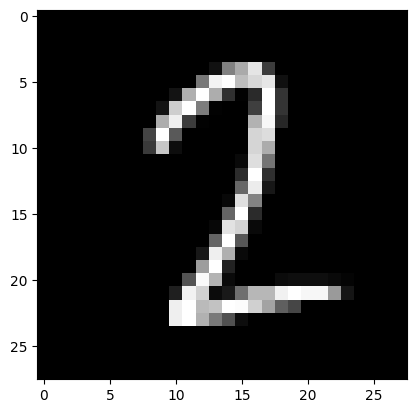

In [47]:
# Practical 4: Image Recognition on MNIST dataset using Neural Network

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (MNIST: 28x28 grayscale handwritten digits)
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1 for faster training)
X_train, x_test = X_train / 255.0, x_test / 255.0

# Build simple feedforward neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),       # Flatten 28x28 image to 1D (784)
    keras.layers.Dense(128, activation='relu'),       # Hidden layer with ReLU activation
    keras.layers.Dense(10, activation='softmax')      # Output layer (10 digits, softmax for probabilities)
])

model.summary()   # Show layer details

# Compile model (SGD optimizer + cross-entropy loss for classification)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model with training set and validate on test set
history = model.fit(X_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f, Accuracy=%.3f" % (test_loss, test_acc))

# Predict on a single image
plt.imshow(x_test[456], cmap="gray")                   # Show test image
predicted_value = model.predict(x_test)                # Predict all test images
print("Predicted digit =", np.argmax(predicted_value[456]))  # Get highest probability index

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Output after training:
 [[0.11039235]
 [0.09214506]
 [0.92545479]
 [0.91034858]]

Actual Output:
 [[0]
 [0]
 [1]
 [1]]


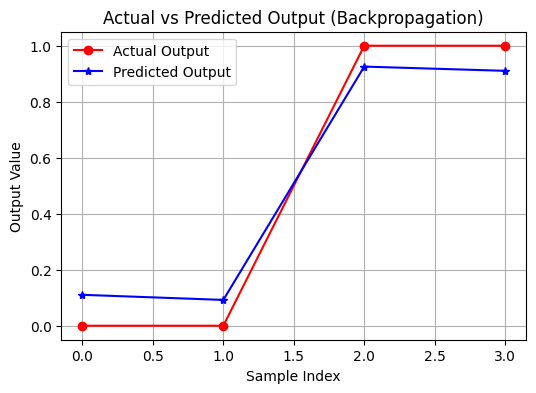

In [53]:
# Practical 5: Backpropagation using NumPy

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function + derivative
def nlinear(x, deriv=False):
    if deriv:
        return x * (1 - x)   # derivative of sigmoid
    return 1 / (1 + np.exp(-x))  # sigmoid function

# Input data (last column = bias term)
x = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Output labels (AND function)
y = np.array([[0],
              [0],
              [1],
              [1]])

# Set seed for reproducibility
np.random.seed(1)

# Initialize weights randomly in range [-1,1]
synapse0 = 2*np.random.random((3,1)) - 1

# Training parameters
iterations = 1000
learning_rate = 0.1  # added learning rate for stability

# Training loop
for i in range(iterations):
    layer0 = x                                # input layer
    layer1 = nlinear(np.dot(layer0, synapse0)) # forward pass
    layer1_error = y - layer1                 # error at output
    layer1_delta = layer1_error * nlinear(layer1, deriv=True)  # backprop
    synapse0 += learning_rate * np.dot(layer0.T, layer1_delta) # weight update

# Final predicted output
print("Output after training:\n", layer1)
print("\nActual Output:\n", y)

# Improved Plot
plt.figure(figsize=(6,4))
plt.plot(y, 'ro-', label="Actual Output")       # red points = expected
plt.plot(layer1, 'b*-', label="Predicted Output") # blue stars = model prediction
plt.xlabel("Sample Index")
plt.ylabel("Output Value")
plt.title("Actual vs Predicted Output (Backpropagation)")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Practical 6: Ensemble Learning - Bagging, Decision Tree, Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

df = pd.read_csv("content/sample_data/diabetes.csv")

# Split features and target
X = df.drop("Outcome", axis=1)   # Input features
y = df["Outcome"]                # Target variable (0 or 1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (stratified to balance 0/1 classes)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, random_state=42
)

# 1. Decision Tree (Baseline model)
dt_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Decision Tree CV Mean Accuracy:", dt_scores.mean())

# 2. Bagging Classifier with Decision Tree
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,    # number of trees
    max_samples=0.8,     # bootstrap samples
    oob_score=True,      # out-of-bag evaluation
    random_state=42
)
bag_model.fit(X_train, y_train)
print("Bagging OOB Score:", bag_model.oob_score_)

bag_scores = cross_val_score(bag_model, X, y, cv=5)
print("Bagging CV Mean Accuracy:", bag_scores.mean())

# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Mean Accuracy:", rf_scores.mean())


Decision Tree CV Mean Accuracy: 0.7071301247771836
Bagging OOB Score: 0.7534722222222222
Bagging CV Mean Accuracy: 0.7709107885578474
Random Forest CV Mean Accuracy: 0.7669977081741788


Test Accuracy: 0.788
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.93      0.82        27
        True       0.89      0.64      0.74        25

    accuracy                           0.79        52
   macro avg       0.81      0.78      0.78        52
weighted avg       0.81      0.79      0.78        52



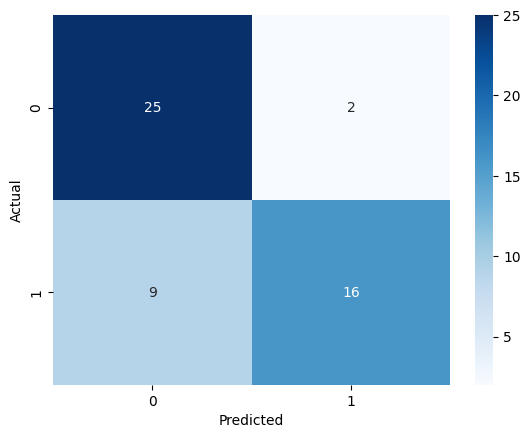

In [64]:
# Practical 7: Regularization on Sonar Dataset using Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# Load dataset (Sonar: 60 features, 1 target column)
df = pd.read_csv("content/sample_data/sonar.csv", header=None)

# Split features (X) and target (y)
X = df.drop(60, axis=1)        # first 60 columns = features
y = pd.get_dummies(df[60], drop_first=True)  # convert labels 'R','M' to binary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Build Neural Network with Dropout Regularization
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),   # Input layer
    keras.layers.Dropout(0.5),                                 # Dropout to prevent overfitting
    keras.layers.Dense(30, activation='relu'),                 # Hidden layer
    keras.layers.Dropout(0.5),                                 # Dropout
    keras.layers.Dense(15, activation='relu'),                 # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')                # Output layer (binary classification)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)  # silent training

# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.3f}")

# Predictions
y_pred = np.round(model.predict(X_test).reshape(-1))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1361s 8us/step 
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 130ms/step - accuracy: 0.3406 - loss: 1.7734 - val_accuracy: 0.4950 - val_loss: 1.3657
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 97ms/step - accuracy: 0.4839 - loss: 1.4300 - val_accuracy: 0.5523 - val_loss: 1.2254
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 104ms/step - accuracy: 0.5386 - loss: 1.2916 - val_accuracy: 0.5956 - val_loss: 1.1413
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.5741 - loss: 1.2079 - val_accuracy: 0.6283 - val_loss: 1.0435
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.5970 - loss: 1.1424 - val_accuracy: 0.6616 - val_loss: 0.9661
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6616 - loss: 0.9661
Test Accuracy: 0.6616
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.73      0.70      0.71      1000
  automobile       0.75 

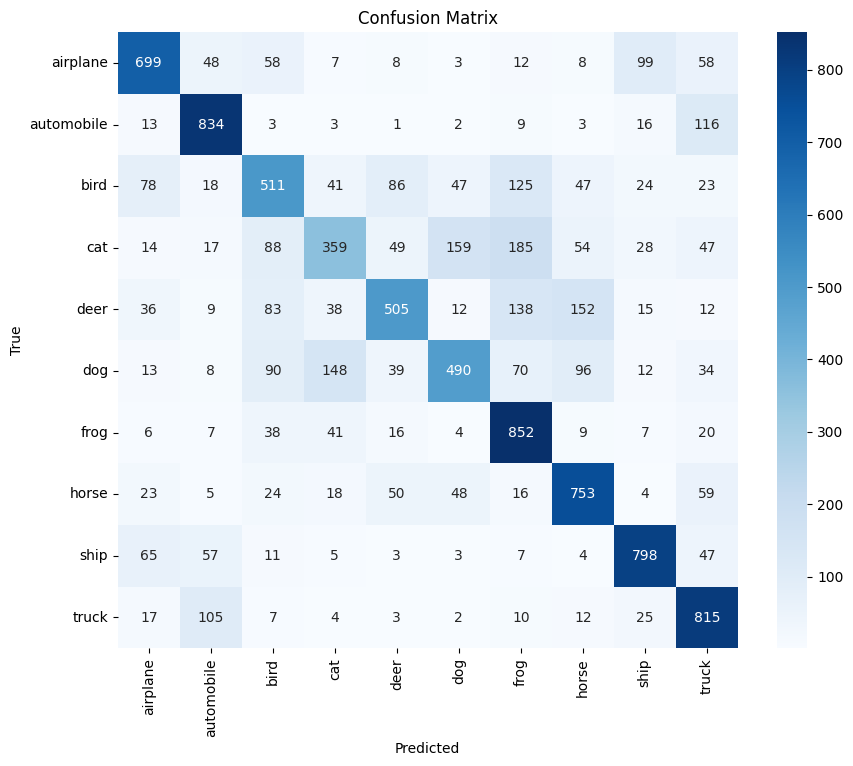

In [65]:
# Practical 8 - CNN on CIFAR-10 Dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),  # Conv Layer 1
    MaxPooling2D((2,2)),                                          # Pooling 1
    Conv2D(64, (3,3), activation='relu'),                         # Conv Layer 2
    MaxPooling2D((2,2)),                                          # Pooling 2
    Conv2D(128, (3,3), activation='relu'),                        # Conv Layer 3
    MaxPooling2D((2,2)),                                          # Pooling 3
    Flatten(),                                                    # Flatten
    Dense(128, activation='relu'),                                # Dense Layer
    Dropout(0.5),                                                 # Dropout
    Dense(10, activation='softmax')                               # Output Layer
])

# Compile model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=5, validation_data=(X_test, y_test), verbose=1)

# Evaluate on test data
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [66]:
# Practical 9A: Data Augmentation on a Single Image

# Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Retrieve label mapping function
get_label_name = metadata.features['label'].int2str

# Get a sample image and label
image, label = next(iter(train_ds))

# Display original image
plt.imshow(image)
plt.title(get_label_name(label))
plt.axis('off')
plt.show()

# Define preprocessing pipeline
IMG_SIZE = 180
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

# Apply preprocessing
preprocessed_image = resize_and_rescale(image)
plt.imshow(preprocessed_image)
plt.title("Resized & Rescaled")
plt.axis('off')
plt.show()

# Data Augmentation Examples

# 1. Flip image left-right
plt.imshow(tf.image.flip_left_right(image))
plt.title("Flipped")
plt.axis('off')
plt.show()

# 2. Convert to grayscale
plt.imshow(tf.image.rgb_to_grayscale(image), cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

# 3. Adjust saturation
plt.imshow(tf.image.adjust_saturation(image, 3))
plt.title("Saturation x3")
plt.axis('off')
plt.show()

# 4. Adjust brightness
plt.imshow(tf.image.adjust_brightness(image, 0.4))
plt.title("Brightness +0.4")
plt.axis('off')
plt.show()

# 5. Crop the image (central crop)
plt.imshow(tf.image.central_crop(image, 0.5))
plt.title("Central Crop 50%")
plt.axis('off')
plt.show()

# 6. Adjust hue
plt.imshow(tf.image.adjust_hue(image, 0.2))
plt.title("Hue +0.2")
plt.axis('off')
plt.show()

# 7. Rotate 90 degrees counterclockwise
plt.imshow(tf.image.rot90(image))
plt.title("Rotated 90°")
plt.axis('off')
plt.show()

# 8. Random crop with seed
for i in range(4):
    cropped = tf.image.stateless_random_crop(
        image, size=[210, 300, 3], seed=(i, 0)
    )
    plt.imshow(cropped.numpy().astype("uint8"))
    plt.title(f"Random Crop {i+1}")
    plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'tensorflow_datasets'